# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vina Zahrotun Nazah
- **Email:** Pinaunpina@gmail.com
- **ID Dicoding:** pina_pinaun_26pG

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh factor cuaca ( temperature, kelembapan, dan kecepatan angin) terhadap jumlah penyewa sepeda
2. Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan waktu dan hari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Menampilkan Data Day
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menampilkan Data Hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

Day

In [ ]:
#Info Data Day
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Menampilkan Missing Value data day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print(day_df['season'].unique())
print(day_df['yr'].unique())
print(day_df['mnth'].unique())
print(day_df['holiday'].unique())
print(day_df['weekday'].unique())
print(day_df['workingday'].unique())
print(day_df['weathersit'].unique())


[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


Hour

In [ ]:
#Info Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Menampilkan Missing Value data Hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
setelah dianalisis dari kedua data tersebut terdapat kesalahan pada tipe data dteday dimana tipe data seharusnya adalah datetime

### Cleaning Data

In [ ]:
# mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
# mengubah kolom-kolom yang sebaiknya menjadi kategori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[categorical_columns] = day_df[categorical_columns].astype('category')

In [ ]:
#Info Data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

hour

In [ ]:
# mengubah kolom 'dteday' menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
#mengubah kolom kolom yang seharusnya menjadi kategori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']
# Mengonversi kolom kategorikal menjadi category
hour_df[categorical_columns] = hour_df[categorical_columns].astype('category')


In [ ]:
#Info Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
setelah kita lakukan cleaning data, dapat kita lihat disitu variabel dteday sudah bertipe datetime, tidak ada duplikasi dan beberapa variabel yang diubah menjadi kategori

## Exploratory Data Analysis (EDA)

1. bagaimana jumlah rata-rata sepeda yang dipinjam berubah dari bulan ke bulan.
2. bagaimana jumlah peminjaman sepeda berubah selama periode dua tahun.
3. bagaimana rata-rata peminjaman sepeda per hari

### Explore ...

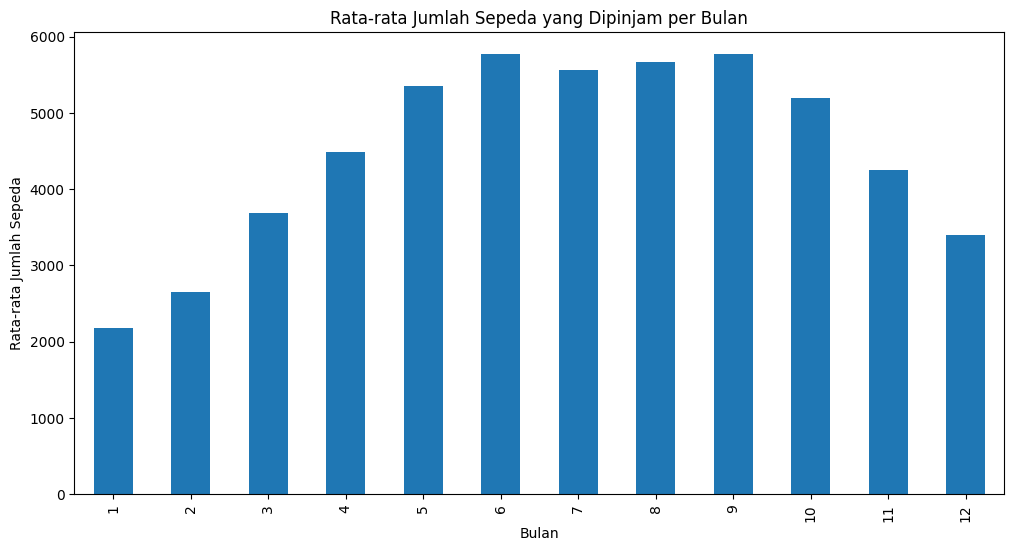

In [ ]:
#Analisis tren jumlah sepeda yang dipinjam setiap bulan
day_df['month'] = day_df['dteday'].dt.month
monthly_rentals = day_df.groupby('month')['cnt'].mean()
plt.figure(figsize=(12, 6))
monthly_rentals.plot(kind='bar')
plt.title('Rata-rata Jumlah Sepeda yang Dipinjam per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

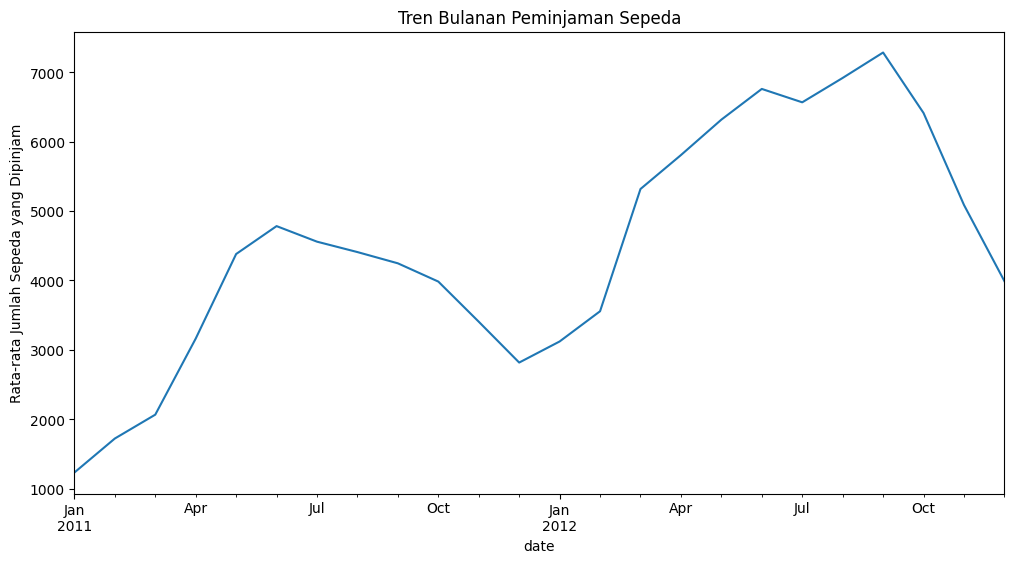

In [ ]:
#Tren peminjaman sepeda selama dua tahun
day_df['date'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('date', inplace=True)
day_df['cnt'].resample('ME').mean().plot(figsize=(12, 6))
plt.title('Tren Bulanan Peminjaman Sepeda')
plt.ylabel('Rata-rata Jumlah Sepeda yang Dipinjam')
plt.show()

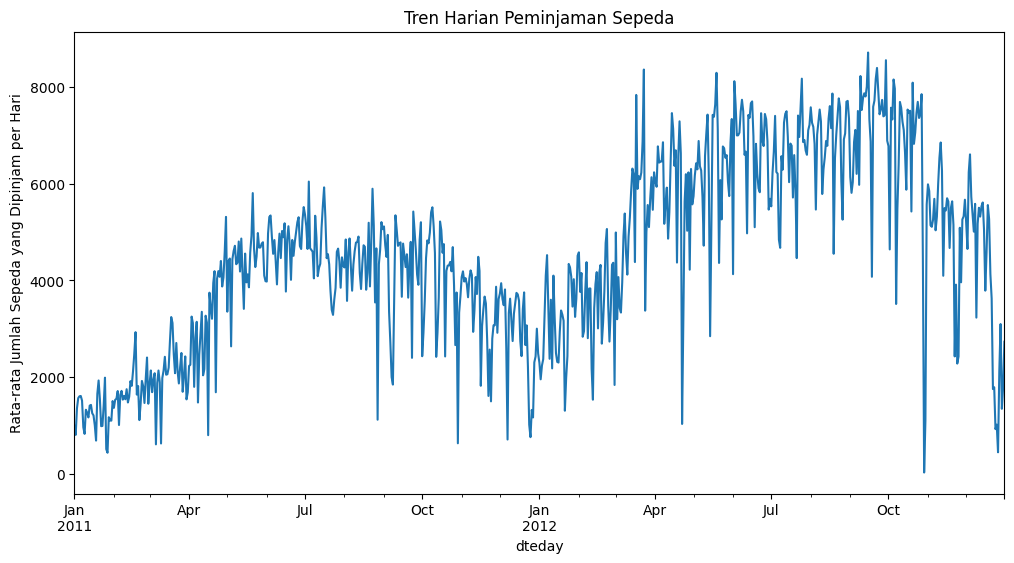

In [ ]:
# Tren peminjaman sepeda
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)
day_df['cnt'].resample('D').mean().plot(figsize=(12, 6))
plt.title('Tren Harian Peminjaman Sepeda')
plt.ylabel('Rata-rata Jumlah Sepeda yang Dipinjam per Hari')
plt.show()


**Insight:**
berdasarkan hasil visualisasi data diatas dapat kita simpulkan bahwa peminjaman terbanyak itu ada di sekitar bulan oktober

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh factor cuaca ( temperature, kelembapan, dan kecepatan angin) terhadap jumlah penyewa sepeda

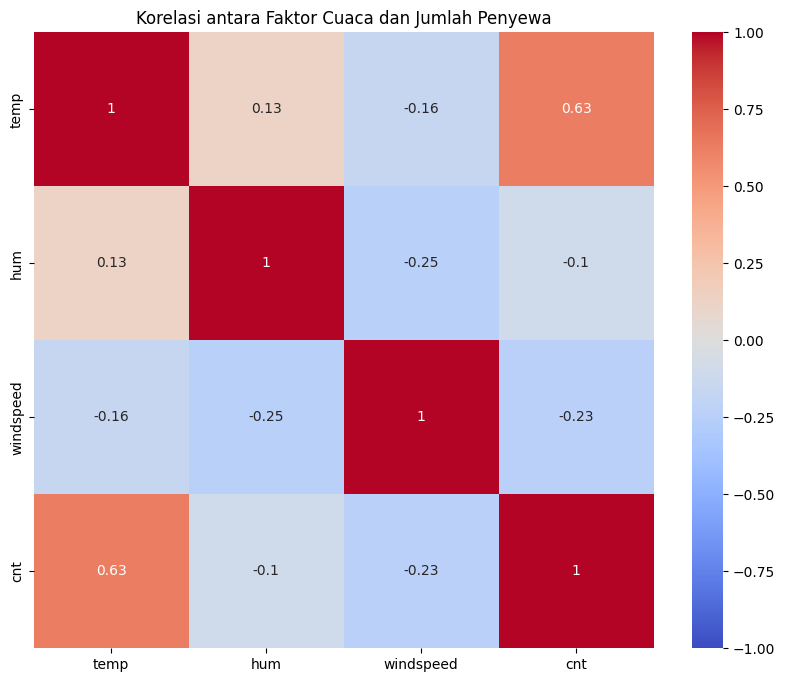

In [ ]:
#heatmap korelasi
weather_factors = ['temp', 'hum', 'windspeed', 'cnt']
correlation = day_df[weather_factors].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewa')
plt.show()


### Pertanyaan 2:
Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan waktu dan hari?

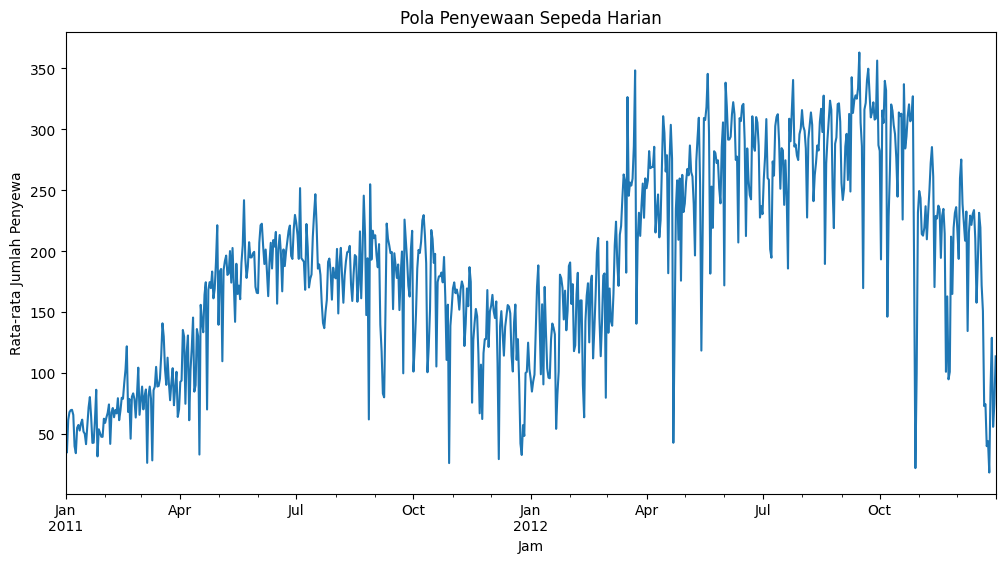

In [ ]:
# Line plot untuk pola harian
daily_pattern = hour_df.groupby('dteday')['cnt'].mean()
plt.figure(figsize=(12, 6))
daily_pattern.plot()
plt.title('Pola Penyewaan Sepeda Harian')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

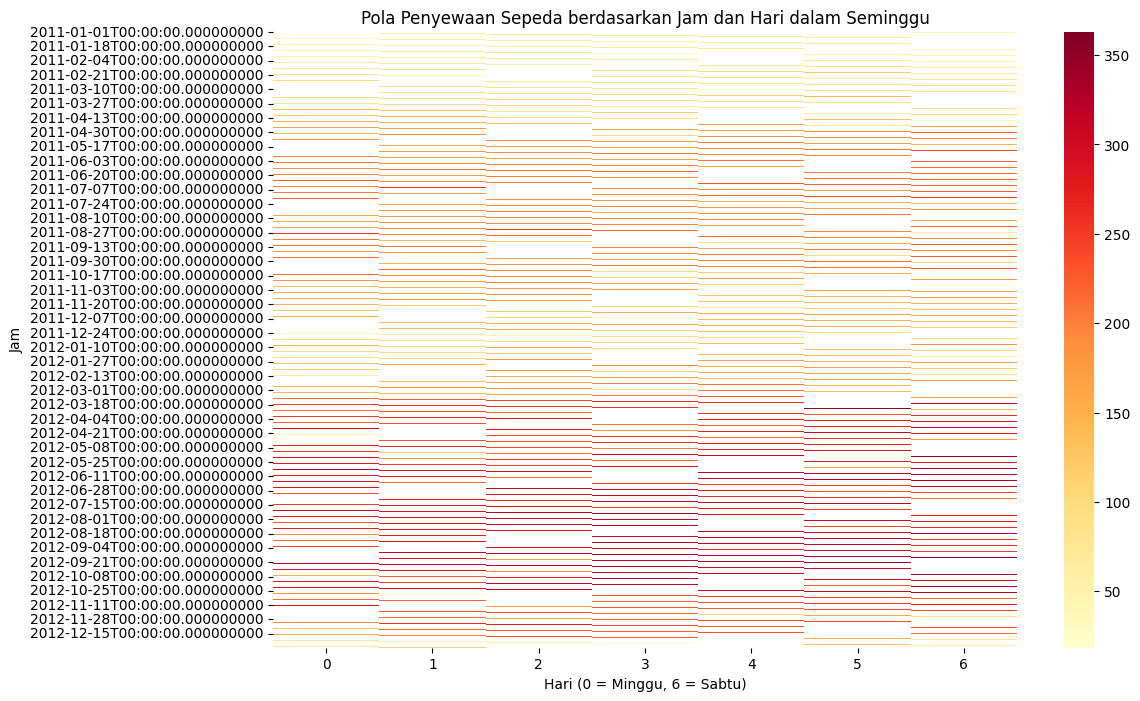

In [ ]:
# Heatmap pola mingguan dan jam
hourly_weekday = hour_df.pivot_table(values='cnt', index='dteday', columns='weekday', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_weekday, cmap='YlOrRd')
plt.title('Pola Penyewaan Sepeda berdasarkan Jam dan Hari dalam Seminggu')
plt.xlabel('Hari (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Jam')
plt.show()

**Insight:**
a. Temperatur:
Ada korelasi positif yang kuat antara temperatur dan jumlah penyewa.
Saat temperatur meningkat, jumlah penyewa cenderung meningkat.
Hubungan ini tampak non-linear, dengan peningkatan yang lebih cepat pada temperatur menengah.

b. Kelembapan:
Terdapat korelasi negatif antara kelembapan dan jumlah penyewa.
Saat kelembapan meningkat, jumlah penyewa cenderung menurun.
Efeknya tidak sekuat temperatur, tetapi masih signifikan.

c. Kecepatan Angin:
Ada korelasi negatif lemah antara kecepatan angin dan jumlah penyewa.
Saat kecepatan angin meningkat, ada sedikit penurunan dalam jumlah penyewa.
Efeknya tidak sekuat temperatur atau kelembapan.

**Pola Harian:**
a. Terdapat dua puncak penyewaan yang jelas: satu di pagi hari (sekitar jam 8) dan satu di sore hari (sekitar jam 17-18).
Puncak sore hari cenderung lebih tinggi dibandingkan puncak pagi hari.
Jumlah penyewaan paling rendah terjadi pada dini hari (sekitar jam 3-4).

b. Pola Mingguan:
Hari kerja (Senin-Jumat) memiliki pola yang mirip dengan dua puncak yang jelas.
Akhir pekan (Sabtu-Minggu) memiliki pola yang berbeda, dengan peningkatan penyewaan yang lebih bertahap sepanjang hari dan puncak di siang hari.
Jumlah penyewaan pada hari kerja cenderung lebih tinggi dibandingkan akhir pekan, terutama pada jam-jam sibuk.

c. Perbedaan Hari Kerja vs Akhir Pekan:
Hari kerja menunjukkan pola commuting yang jelas dengan dua puncak.
Akhir pekan menunjukkan pola rekreasi dengan satu puncak yang lebih lama di tengah hari.

d. Variasi Antar Hari:
Selasa, Rabu, dan Kamis cenderung memiliki jumlah penyewaan tertinggi.
Minggu memiliki jumlah penyewaan terendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Faktor cuaca memiliki pengaruh signifikan terhadap jumlah penyewa sepeda. Temperatur menunjukkan korelasi positif yang kuat dan non-linear, dengan peningkatan jumlah penyewa yang lebih cepat pada temperatur menengah. Kelembapan memiliki korelasi negatif yang cukup signifikan, menyebabkan penurunan jumlah penyewa saat kelembapan meningkat. Kecepatan angin menunjukkan korelasi negatif yang lemah, dengan sedikit penurunan jumlah penyewa saat kecepatan angin meningkat, namun efeknya tidak sekuat temperatur atau kelembapan.
- Conclution pertanyaan 2
Pola penyewaan sepeda menunjukkan variasi yang jelas berdasarkan waktu dan hari. Secara harian, terdapat dua puncak penyewaan: di pagi hari sekitar pukul 8 dan sore hari sekitar pukul 17-18, dengan puncak sore yang lebih tinggi dan titik terendah pada dini hari. Pola mingguan menunjukkan perbedaan antara hari kerja dan akhir pekan, di mana hari kerja memiliki dua puncak yang mencerminkan pola commuting, sementara akhir pekan menunjukkan peningkatan bertahap dengan puncak tunggal di siang hari, mencerminkan pola rekreasi. Umumnya, penyewaan pada hari kerja lebih tinggi dibandingkan akhir pekan, terutama pada jam sibuk, dengan Selasa, Rabu, dan Kamis sebagai hari-hari dengan penyewaan tertinggi, sementara Minggu memiliki penyewaan terendah.

Berdasarkan analisis pola penyewaan sepeda dan pengaruh cuaca, beberapa rekomendasi dapat diimplementasikan untuk meningkatkan efisiensi dan efektivitas layanan. Ini meliputi optimalisasi inventaris sepeda berdasarkan prakiraan cuaca dan pola waktu, merancang strategi pemasaran yang ditargetkan untuk periode permintaan rendah, menjadwalkan pemeliharaan dan redistribusi sepeda pada waktu-waktu sepi, mempertimbangkan penyediaan perlengkapan tambahan untuk kondisi cuaca tertentu, serta mengembangkan model prediksi permintaan yang lebih akurat dengan mempertimbangkan faktor cuaca dan pola waktu untuk perencanaan jangka panjang yang lebih baik.